# Analysis 2
Analysis is done to calculate the average number of home runs per game over the years and then look at the average home runs by team. This analysis will answer these questions:
How have the number of home runs hit per game changed over the years?
Which teams hit the most home runs on average?

In [13]:
#Import all the necessary libraries required for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Importing scipy to fit the data using linear regression
import scipy as sp

In [15]:
# This is to allow inline plots
%matplotlib inline

In [16]:
#Setting the default size for Matplotlib
plt.rc('figure', figsize=(11, 8))

In [17]:
#Fetching the team data into a variable named "Team"
team = pd.read_csv('D:/Users/vin/Desktop/FinalProject-Python/the-history-of-baseball/team.csv', header=0)

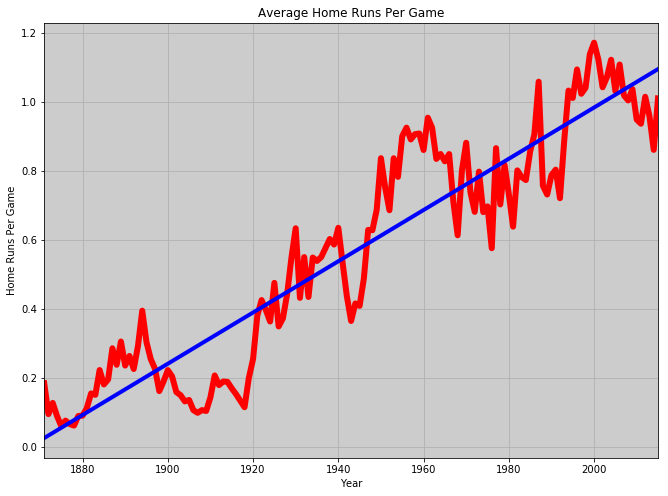

In [25]:
def get_homeruns_per_game(group):
    return group.hr.sum()/(1.0*group.g.sum()) #Given a pandas group, here we are trying to get the average number of home runs per games by defining a function

avg_hr = teams.groupby(['year']).apply(get_homeruns_per_game)
#Here we are calculating the average number of home runs and loading it to a datagrame names avg_hr

hr = avg_hr.as_matrix()
yr = np.array(avghr.index)
# Converting the data to numpy so that it fits with linear regression 

fp1 = sp.polyfit(yr,hr,1)
f1 = sp.poly1d(fp1)
# Using scipy polyfit function so as to fit the data using linear regression

fx = sp.linspace(yr.min(),yr.max(),100)
#Setting up the value of x

p=avg_hr.plot(title='Home Runs Per Year',c='r',linewidth=6, grid=True)
p.plot(fx,f1(fx),linewidth=4,c='blue')
p.set_facecolor('0.8')
p.set_title('Average Home Runs Per Game')
p.set_ylabel('Home Runs Per Game')
p.set_xlabel('Year')
plt.show()
#Plotting the average number of home runs per game as shown below

In [26]:
print("The average number of home runs per game has increased at a rate of %.4f per year" % fp1[0])

The average number of home runs per game has increased at a rate of 0.0074 per year


In [30]:
currentTeams = np.sort(teams[teams['year']==2015].franchise_id.values)
#Getting a list of all the current team franchises

currentTeamsYears = []
for year in teams['year'].unique():
    teamsInYear = np.sort(teams[teams['year']==year].franchise_id.values)
    if len(teamsInYear) != len(currentTeams):
        continue
    if all(currentTeams == teamsInYear):
        currentTeamsYears.append(year)
#Getting the list of all the years where we can see the current team franchies playing

print('The first season with all of the current teams was: %i' % min(currentTeamsYears))
#Returning the first year where we are able to see all the curren teams who are playing

The first season with all of the current teams was: 1998


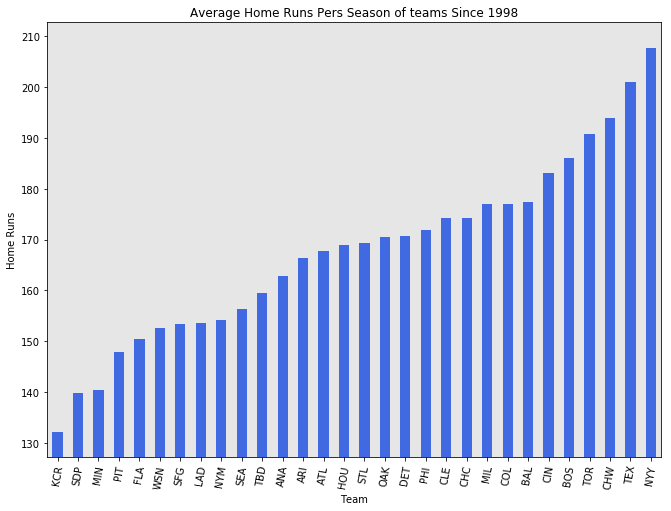

In [32]:
avgteamhr = teams[teams['year']>1998].groupby(['franchise_id']).hr.mean()
#Getting the average number of home runs of the teams as per 1998 data

avgteamhr.sort_values(inplace=True)
#Sorting the data from ascending order i.e from least to most home runs hit

p = avgteamhr.plot(kind='bar',rot=80,ylim=[avgteamhr.min()-5,avgteamhr.max()+5],\
                   color='royalblue',title='Average Home Runs Pers Season of teams Since 1998')
p.set_ylabel('Home Runs')
p.set_xlabel('Team')
p.set_facecolor('0.9')
plt.show()
#Below is the bar plot which shows the average home runs per season as per 1998